In [1]:
import pandas 
import numpy as np 
import math
df = pandas.read_csv("input.txt", header=None, names=["command","step"], sep=" ")

## Part 1

In [2]:
instructions = {"forward":[1,0], "up":[0,-1],"down":[0,1]}
df["vect_command"] = df["command"].map(instructions).apply(lambda x: np.array(x))

In [3]:
math.prod(np.multiply(df.vect_command, df.step).sum())

2073315

## Part 2

In [5]:
df["aim"] = df.apply(lambda x:x.step if x["command"]=="down" else(-x.step if x["command"]=="up" else 0), axis=1).cumsum()

In [6]:
df["vect_command_aim"] = df.apply(lambda x:(x.vect_command+[0,x.aim]) if x.command=="forward" else [0,0],axis=1).apply(lambda x: np.array(x))

In [7]:
math.prod(np.multiply(df.vect_command_aim, df.step).sum())

1840311528

## Extra

**data viz for part 1**

In [33]:
temp = np.multiply(df.vect_command, df.step).cumsum()
x = np.transpose([temp[i][0] for i in range(len(temp))])
y = np.transpose([temp[i][1] for i in range(len(temp))])

In [41]:
pos_df = pandas.DataFrame({'x':x, 'y':-y})


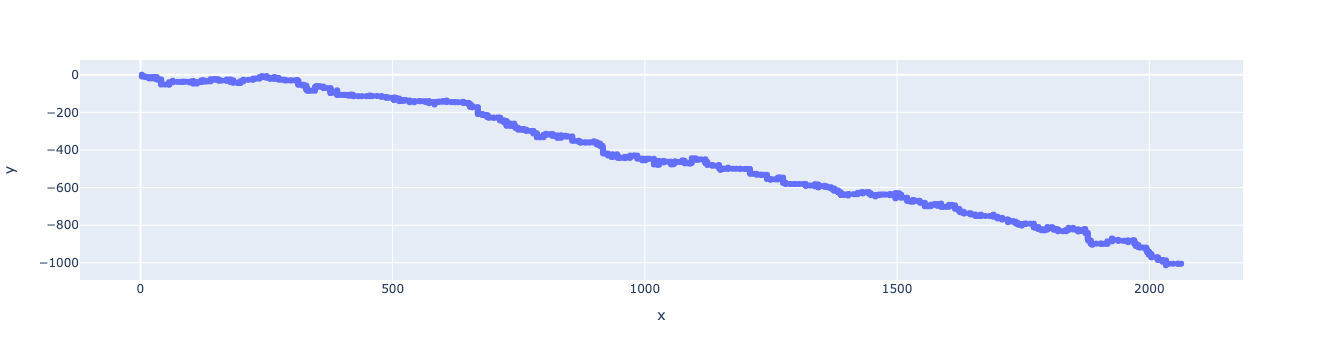

In [53]:
import plotly.express as px
fig = px.scatter(pos_df,x='x',y='y')
fig.show()

if we take our last point, we should get the pos that gives us the result of part 1 (multiplied by -1 because we put y in negative for the graph)

In [47]:
math.prod(pos_df.iloc[-1])*-1

2073315

**data viz for part 2:**

In [60]:
temp_aim = np.multiply(df.vect_command_aim, df.step).cumsum()
x_aim = np.transpose([temp_aim[i][0] for i in range(len(temp_aim))])
y_aim = np.transpose([temp_aim[i][1] for i in range(len(temp_aim))])

In [61]:
pos_aim_df = pandas.DataFrame({'x':x_aim, 'y':-y_aim})

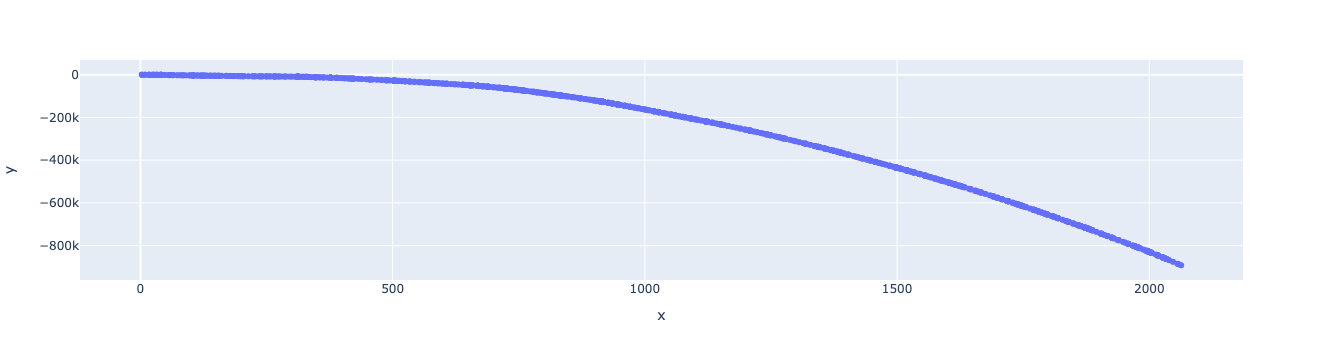

In [62]:
fig = px.scatter(pos_aim_df,x='x',y='y')
fig.show()

In [63]:
math.prod(pos_aim_df.iloc[-1])*-1

1840311528

we also get our final result with the last row